READING DATA

In [105]:
#Masukan Library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import dateutil.parser as parser

In [106]:
 #Masukan Dataset dan Analisis Informasi Dalam Dataset
datatransaksi = pd.read_csv("data_transaksi_pelanggan.csv",sep=';')
datatransaksi.head()

,AL_Type,AR_No,CustID,Layanan,CreatedOn
0,Relokasi,AR/RLK/1908/0701,40000348,IPVPN,05/08/2019 15.55
1,New,AR/ACT/1907/21687,40000348,IPVPN,18/07/2019 16.02
2,Relokasi,AR/RLK/1906/0525,40000348,IPVPN,14/06/2019 10.00
3,Downgrade,AR/DOW/1909/0415,60000740,InternetCorporate,05/09/2019 10.37
4,Downgrade,AR/DOW/1909/0413,120000125,InternetCorporate,03/09/2019 10.37


In [107]:
#Melihat Informasi Data
datatransaksi.describe()

,AL_Type,AR_No,CustID,Layanan,CreatedOn
count,12059,11843,12061,12061,11838
unique,6,11839,1063,57,8278
top,New,AR/CHT/1909/3926,180000053,InternetCorporate,18/03/2021 16.07
freq,7473,2,2135,2053,38


PREPROCESSING DATA

In [108]:
#Langkah 3 : Pembersihan Data 

#membersihkan data yang kosong
datatransaksi.dropna(axis = 0, inplace = True)

# #membuang tipe transaksi yang tidak mengandung penambahan layanan
indexType = datatransaksi[(datatransaksi['AL_Type'] == 'Trial')].index
datatransaksi.drop(indexType , inplace=True)
datatransaksi = datatransaksi[~datatransaksi['AR_No'].str.contains('CHT')]

#replace layanan yang memiliki jenis sama
datatransaksi['Layanan'] = datatransaksi['Layanan'].replace(['NET-ACCESSBroadband'], 'InternetBroadbandCorporate')
datatransaksi['Layanan'] = datatransaksi['Layanan'].replace(['NET-ACCESSCorporate'], 'InternetCorporate')
datatransaksi['Layanan'] = datatransaksi['Layanan'].replace(['NET-VPN'], 'IPVPN')

datatransaksi.describe()


,AL_Type,AR_No,CustID,Layanan,CreatedOn
count,8167,8167,8167,8167,8167
unique,5,8164,891,50,5831
top,New,AR/DOW/2012/0987,180000053,InternetCorporate,18/03/2021 16.07
freq,6834,2,925,1685,38


In [109]:
#Mengubah kolom 'date_time' menjadi format yang tepat
datatransaksi['CreatedOn']= pd.to_datetime(datatransaksi['CreatedOn'],format='%d/%m/%Y %H.%M')

# memisahkan tanggal
datatransaksi['Date'] = datatransaksi['CreatedOn'].dt.date

#memisahkan waktu
datatransaksi['Time'] = datatransaksi['CreatedOn'].dt.time

# Extracting month and replacing it with text
datatransaksi['Month'] = datatransaksi['CreatedOn'].dt.month
datatransaksi['Month'] = datatransaksi['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), ('January','February','March','April','May','June','July','August','September','October','November','December'))

# Extracting weekday and replacing it with text
datatransaksi['Days'] = datatransaksi['CreatedOn'].dt.weekday
datatransaksi['Days'] = datatransaksi['Days'].replace((0,1,2,3,4,5,6), ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# dropping date_time column
datatransaksi.drop('CreatedOn', axis = 1, inplace = True)

datatransaksi.head()



,AL_Type,AR_No,CustID,Layanan,Date,Time,Month,Days
0,Relokasi,AR/RLK/1908/0701,40000348,IPVPN,2019-08-05,15:55:00,August,Monday
1,New,AR/ACT/1907/21687,40000348,IPVPN,2019-07-18,16:02:00,July,Thursday
2,Relokasi,AR/RLK/1906/0525,40000348,IPVPN,2019-06-14,10:00:00,June,Friday
3,Downgrade,AR/DOW/1909/0415,60000740,InternetCorporate,2019-09-05,10:37:00,September,Thursday
4,Downgrade,AR/DOW/1909/0413,120000125,InternetCorporate,2019-09-03,10:37:00,September,Tuesday


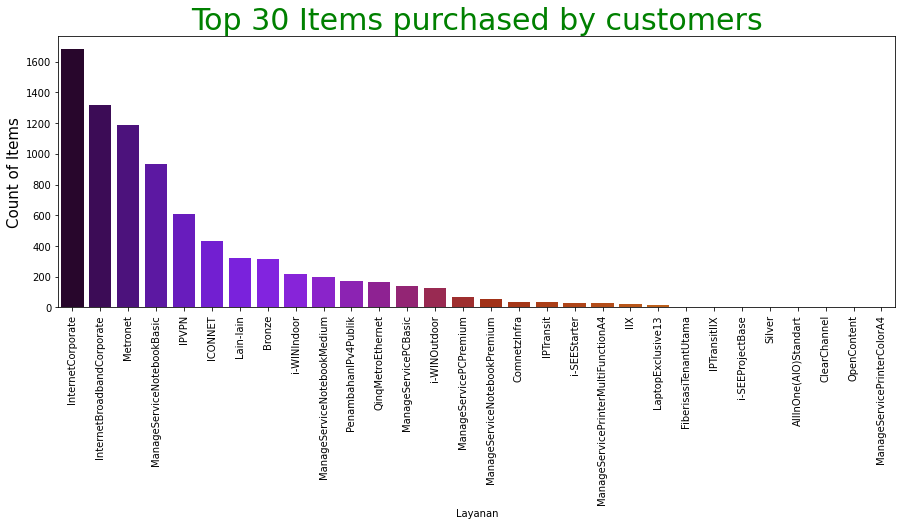

In [110]:
plt.figure(figsize=(15,5))
sns.barplot(x = datatransaksi.Layanan.value_counts().head(30).index, y = datatransaksi.Layanan.value_counts().head(30).values, palette = 'gnuplot')
plt.xlabel('Layanan', size = 10)
plt.xticks(rotation=90)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 30 Items purchased by customers', color = 'green', size = 30)
plt.show()

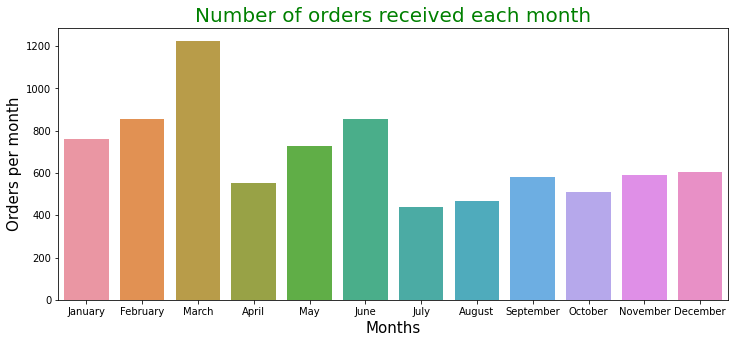

In [111]:
monthTran = datatransaksi.groupby('Month')['CustID'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "Month", y = "CustID")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()



In [112]:
#membuang tipe layanan yang tidak mengandung layanan internet
datatransaksi = datatransaksi[~datatransaksi['Layanan'].str.contains('Manage|ICONNET|Lain|Laptop|Tenant|AIO|ComnetzInfra')]
datatransaksi.describe()

,AL_Type,AR_No,CustID,Layanan,Date,Time,Month,Days
count,5924,5924,5924,5924,5924,5924,5924,5924
unique,5,5921,870,34,927,845,12,7
top,New,AR/ACT/1906/17983,140000783,InternetCorporate,2021-05-25,08:40:00,January,Thursday
freq,4600,2,478,1685,66,39,713,1265


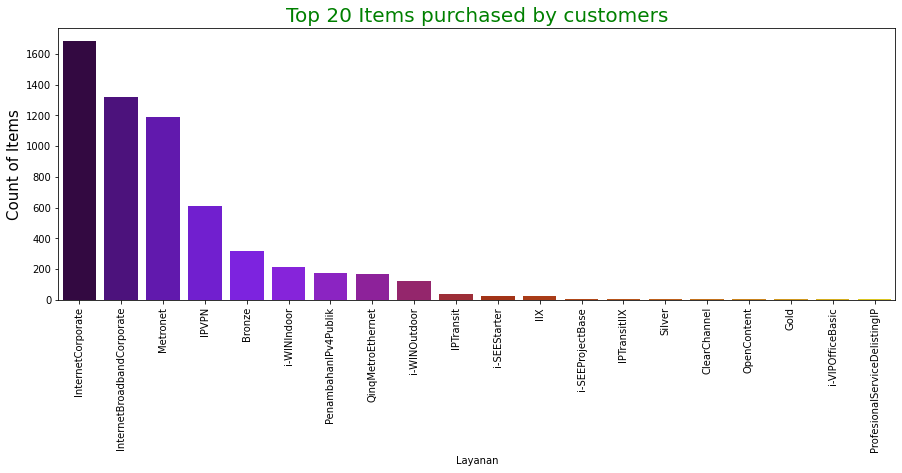

In [113]:
plt.figure(figsize=(15,5))
sns.barplot(x = datatransaksi.Layanan.value_counts().head(20).index, y = datatransaksi.Layanan.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Layanan', size = 10)
plt.xticks(rotation=90)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

In [114]:
# Transformasi Data
transactions_model = datatransaksi.groupby(['CustID', 'Layanan'])['Layanan'].count().reset_index(name ='Count')
data_model = transactions_model.pivot_table(index='CustID', columns='Layanan', values='Count', aggfunc='sum').fillna(0)
data_model.head()

Layanan,Bronze,ClearChannel,Gold,ICONCloudHostedPrivate,ICONCloudUltimateVirtualMachine,ICONCloudVirtualPrivateDataCenter,IIX,IPTransit,IPTransitIIX,IPVPN,...,QinqMetroEthernet,Silver,i-SEEProjectBase,i-SEEStarter,i-VIPLiteHD,i-VIPOfficeBasic,i-VIPOnDemandBasic,i-VIPOnDemandUltimate,i-WINIndoor,i-WINOutdoor
CustID,,,,,,,,,,,,,,,,,,,,,
10000007,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,6.0,2.0
100000167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
def encode(x):
    if x<=0:
        return False
    if x>=1:
        return True

data_model_set = data_model.applymap(encode)
data_model_sets = data_model_set[['Bronze', 'i-WINIndoor', 'PenambahanIPv4Publik', 'i-WINOutdoor', 'IPTransit', 'IIX','i-SEEStarter']]
data_model_sets


Layanan,Bronze,i-WINIndoor,PenambahanIPv4Publik,i-WINOutdoor,IPTransit,IIX,i-SEEStarter
CustID,,,,,,,
10000007,True,True,False,True,False,False,True
100000167,False,False,False,False,False,False,False
10000047,False,False,True,False,False,False,False
10000125,False,False,False,False,False,False,False
10000167,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
990001395,False,False,False,False,False,True,False
990001471,False,False,False,False,False,False,False
990001563,False,False,True,False,False,False,False


In [116]:
apriori_support=apriori(data_model_sets,min_support=0.01,use_colnames=True,verbose=True)
apriori_support


Processing 3 combinations | Sampling itemset size 32


,support,itemsets
0,0.049425,(Bronze)
1,0.050575,(i-WINIndoor)
2,0.185057,(PenambahanIPv4Publik)
3,0.040230,(i-WINOutdoor)
4,0.018391,(IPTransit)
5,0.019540,(IIX)
6,0.025287,"(i-WINIndoor, Bronze)"
7,0.013793,"(PenambahanIPv4Publik, Bronze)"
8,0.013793,"(i-WINIndoor, PenambahanIPv4Publik)"
9,0.010345,"(i-WINIndoor, PenambahanIPv4Publik, Bronze)"


In [117]:
# find rules that it lift value is greater than 1.2, and sorted by descending order.
ar = association_rules(apriori_support, metric='confidence',min_threshold=0.5).round(2)
ar[(ar.lift>1.2)&(ar.antecedents.apply(len)<=2)].sort_values(by='lift',ascending=False).round(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,"(i-WINIndoor, PenambahanIPv4Publik)",(Bronze),0.01,0.05,0.01,0.75,15.17,0.01,3.80
3,"(PenambahanIPv4Publik, Bronze)",(i-WINIndoor),0.01,0.05,0.01,0.75,14.83,0.01,3.80
0,(i-WINIndoor),(Bronze),0.05,0.05,0.03,0.50,10.12,0.02,1.90
1,(Bronze),(i-WINIndoor),0.05,0.05,0.03,0.51,10.12,0.02,1.94
